In [16]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/Vincent2308/Corporate-Bankruptcy/main/data/raw/Taiwan/data.csv')

# ---------------------------------------------------------
# 1. Clean column names (remove spaces, unify names)
# ---------------------------------------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# ---------------------------------------------------------
# 2. Remove rows where ANY ratio = 0 (except bankrupt?)
# ---------------------------------------------------------
ratio_cols = [c for c in df.columns if c != 'bankrupt?']

df_no_zero = df[(df[ratio_cols] != 0).all(axis=1)].copy()
print("Rows after removing zeros:", df_no_zero.shape)

# ---------------------------------------------------------
# 3. Winsorize extreme outliers (1st–99th percentile)
# ---------------------------------------------------------
df_wins = df_no_zero.copy()

for col in ratio_cols:
    lower = df_wins[col].quantile(0.01)
    upper = df_wins[col].quantile(0.99)
    df_wins[col] = df_wins[col].clip(lower, upper)

print("Winsorization complete.")

# ---------------------------------------------------------
# 4. Log-transform skewed ratios (add +1 to avoid log(0))
# ---------------------------------------------------------
skewed_cols = []

for col in ratio_cols:
    if df_wins[col].skew() > 1:
        skewed_cols.append(col)
        df_wins[col] = np.log1p(df_wins[col])  # log(1+x)

print("Log-transformed columns:", skewed_cols)

df_wins.to_csv('data/clean/taiwan_cleaned.csv', index=False)
print("Saved cleaned dataset to taiwan_cleaned.csv")
df_wins.head()


Rows after removing zeros: (0, 96)
Winsorization complete.
Log-transformed columns: []


OSError: Cannot save file into a non-existent directory: 'data/clean'

In [13]:
df_wins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt?                                                0 non-null      int64  
 1   roa(c)_before_interest_and_depreciation_before_interest  0 non-null      float64
 2   roa(a)_before_interest_and_%_after_tax                   0 non-null      float64
 3   roa(b)_before_interest_and_depreciation_after_tax        0 non-null      float64
 4   operating_gross_margin                                   0 non-null      float64
 5   realized_sales_gross_margin                              0 non-null      float64
 6   operating_profit_rate                                    0 non-null      float64
 7   pre-tax_net_interest_rate                                0 non-null      float64
 8   after-tax_net_interest_rate                    

In [14]:
df_wins.describe()

,bankrupt?,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,...,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),net_income_flag,equity_to_liability
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

<Axes: xlabel='Bankrupt?'>

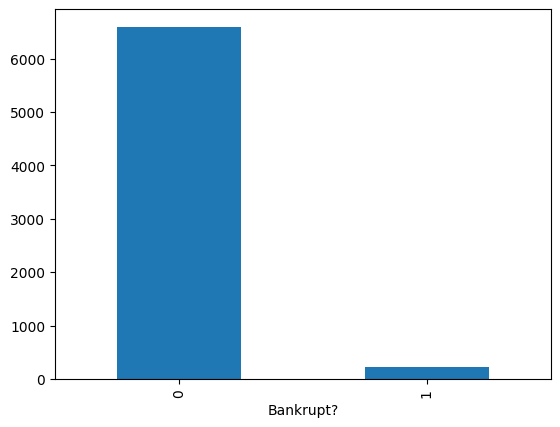

In [ ]:
# Show the amount of bankrupt vs non-bankrupt
df['Bankrupt?'].value_counts().plot(kind='bar')

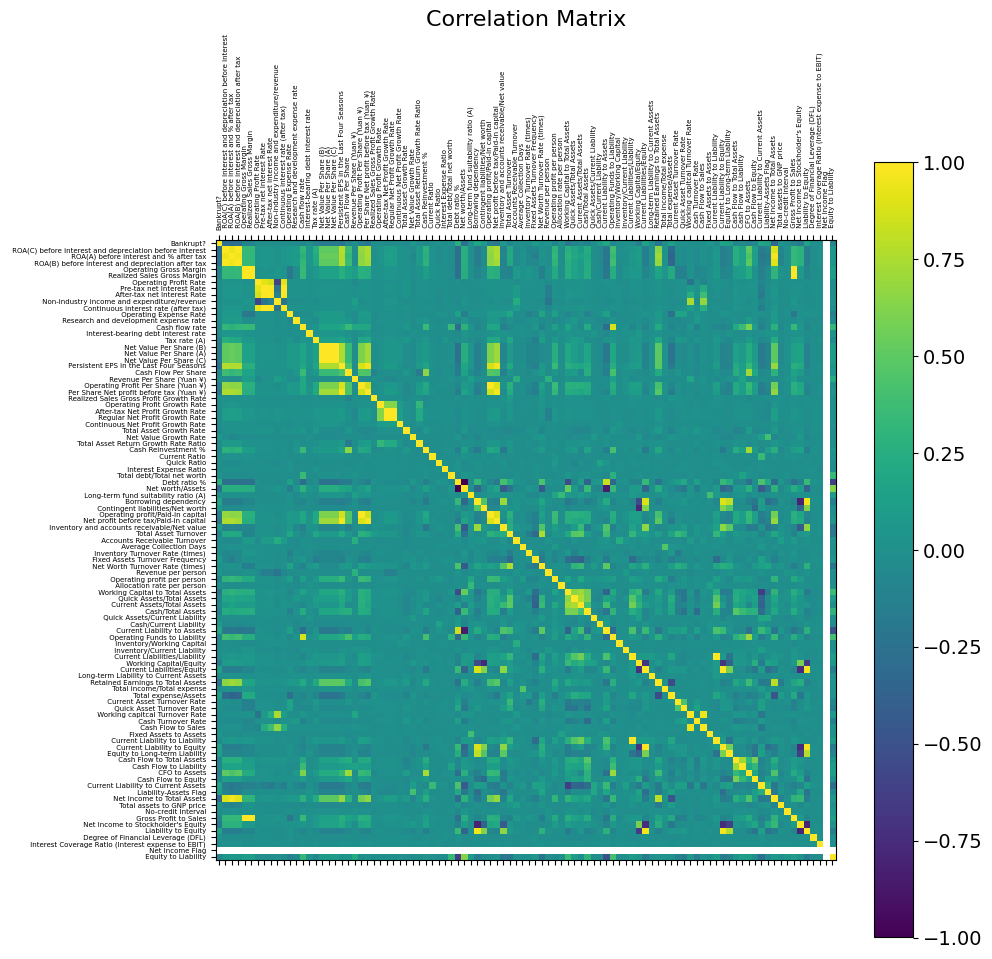

In [ ]:
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas


import matplotlib.pyplot as plt
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=5, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()


In [ ]:
"""
Sort the correlation is descending order.
Although correlation does not imply causation, it still can be a good indicator.
"""
df.corr()['Bankrupt?'].sort_values(ascending=False)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

In [ ]:
# Leverage Ratios


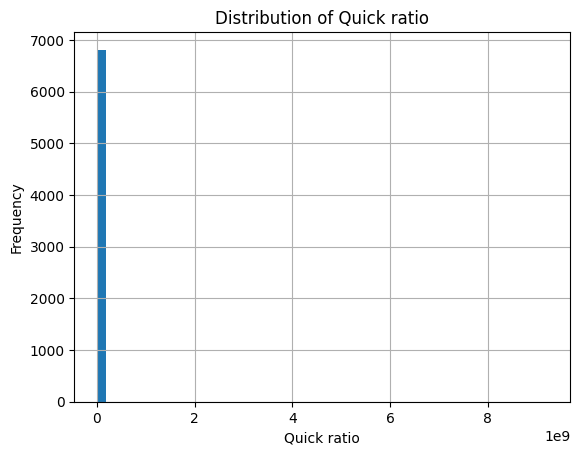

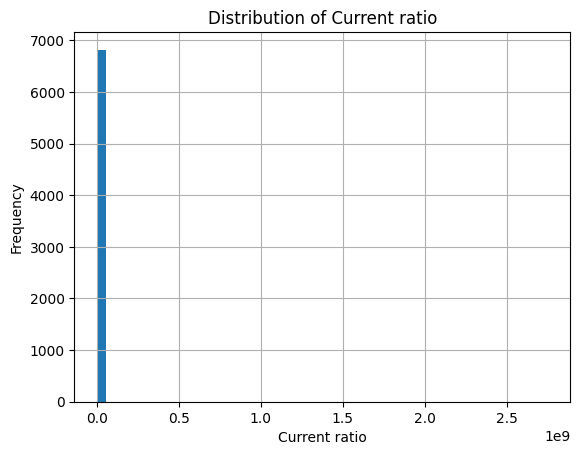

In [ ]:
# Liquidity ratios
#Plot some ratios
df[' Quick Ratio'].hist(bins=50)
plt.title("Distribution of Quick ratio")
plt.xlabel("Quick ratio")
plt.ylabel("Frequency")
plt.show()

df[' Current Ratio'].hist(bins=50)
plt.title("Distribution of Current ratio")
plt.xlabel("Current ratio")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Profitability Ratios


count    6.819000e+03
mean     8.376595e+06
std      2.446847e+08
min      0.000000e+00
25%      4.725903e-03
50%      7.412472e-03
75%      1.224911e-02
max      9.230000e+09
Name:  Quick Ratio, dtype: float64